<a href="https://colab.research.google.com/github/tgparkk/ML-math/blob/main/07-1%20%EC%9D%B8%EA%B3%B5%20%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [7]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


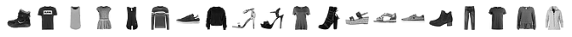

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 20, figsize=(10,10))
for i in range(20):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()


In [11]:
print([train_target[i] for i in range(20)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4]


In [14]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [15]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [16]:
print(train_scaled.shape)

(60000, 784)


In [17]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


In [18]:
import tensorflow as tf

In [19]:
from tensorflow import keras

In [20]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [22]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [23]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [25]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [26]:
model = keras.Sequential(dense)

In [27]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [28]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [29]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6053 - accuracy: 0.7940
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4790 - accuracy: 0.8405
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4560 - accuracy: 0.8481
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4441 - accuracy: 0.8525
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4374 - accuracy: 0.8547


In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4522 - accuracy: 0.8461


[0.4522262513637543, 0.8460833430290222]